<a href="https://colab.research.google.com/github/ritu-kumar/Machine-learning-projects/blob/main/Loan_status_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import accuracy_score


In [3]:
loan_dataset = pd.read_csv('/content/train_u6lujuX_CVtuZ9i (1).csv')

In [4]:
type(loan_dataset)

pandas.core.frame.DataFrame

In [5]:
loan_dataset.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [6]:
loan_dataset.shape

(614, 13)

In [7]:
loan_dataset.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [8]:
# dropping the missing values
loan_dataset = loan_dataset.dropna()

In [9]:
loan_dataset.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [10]:
# Label encoding
# Istead of yes and no for label, putting 1 for yes and 0 for no.
loan_dataset.replace({"Loan_Status":{'Y':1, 'N':0}}, inplace=True) 
loan_dataset.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,0
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,1
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,1
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,1
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,1


In [11]:
loan_dataset['Dependents'].value_counts()

0     274
2      85
1      80
3+     41
Name: Dependents, dtype: int64

In [12]:
# We want to drop all 3+ values with 4.
loan_dataset.replace({"Dependents":{'3+':4}}, inplace= True)
loan_dataset['Dependents'].value_counts()

0    274
2     85
1     80
4     41
Name: Dependents, dtype: int64

<Axes: xlabel='Education', ylabel='count'>

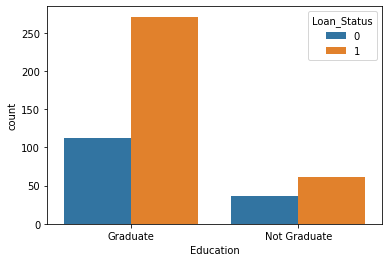

In [13]:
# Data visualisation
# Using seaborn library for plotting 
sns.countplot(x='Education', hue = 'Loan_Status', data = loan_dataset)

<Axes: xlabel='Married', ylabel='count'>

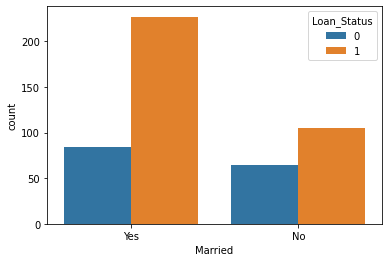

In [14]:
# Marittal status
sns.countplot(x='Married', hue='Loan_Status', data=loan_dataset)

In [41]:
# Converting categorial data to numerical value:
loan_dataset.replace({'Married':{'Yes':1, 'No':0}, 
                      'Gender':{'Male':0,'Female':1}, 
                      'Self_Employed':{'Yes':1, 'No':0}, 
                      'Education':{'Graduate':1, 'Not Graduate':0}, 
                      'Property_Area':{'Rural':1, 'Urban':0, 'Semiurban':2}}, inplace=True)
loan_dataset.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,LP001003,0,1,1,1,0,4583,1508.0,128.0,360.0,1.0,1,0
2,LP001005,0,1,0,1,1,3000,0.0,66.0,360.0,1.0,0,1
3,LP001006,0,1,0,0,0,2583,2358.0,120.0,360.0,1.0,0,1
4,LP001008,0,0,0,1,0,6000,0.0,141.0,360.0,1.0,0,1
5,LP001011,0,1,2,1,1,5417,4196.0,267.0,360.0,1.0,0,1


In [42]:
# Seperating data and labels
x = loan_dataset.drop(columns =[ 'Loan_Status', 'Loan_ID'], axis = 1)
y = loan_dataset['Loan_Status']

In [43]:
print(x)
print(y)

     Gender  Married Dependents  Education  Self_Employed  ApplicantIncome  \
1         0        1          1          1              0             4583   
2         0        1          0          1              1             3000   
3         0        1          0          0              0             2583   
4         0        0          0          1              0             6000   
5         0        1          2          1              1             5417   
..      ...      ...        ...        ...            ...              ...   
609       1        0          0          1              0             2900   
610       0        1          4          1              0             4106   
611       0        1          1          1              0             8072   
612       0        1          2          1              0             7583   
613       1        0          0          1              1             4583   

     CoapplicantIncome  LoanAmount  Loan_Amount_Term  Credit_Hi

In [44]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size =0.1, stratify = y, random_state = 2)
print(y_train.shape)

(432,)


In [45]:
# Training the model: Support vector machine model
classifier = svm.SVC(kernel='linear')

In [46]:
classifier.fit(x_train, y_train)

SVC(kernel='linear')

In [49]:
x_train_prediction = classifier.predict(x_train)
train_accuracy = accuracy_score(x_train_prediction, y_train)
print(train_accuracy)

0.8032407407407407


In [50]:
x_test_prediction = classifier.predict(x_test)
test_accuracy = accuracy_score(x_test_prediction, y_test)
print(test_accuracy)

0.8125


In [ ]:
#Making a predictive system 
x_new = x_test[]
prediction = classifier.predict(x_new)
print(prediction)